In [1]:
import sklearn
from sklearn import ensemble 
from sklearn import datasets
import random
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

# DECISION TREES AND RANDOM FOREST

## Decision Trees

### CART (Classification and Regression Trees)
A decision tree is a tree stucture where each node with children in the tree represents a variable in a decision, each set of branches stemming from a node represents the split, and threshold for a decision leading to another node, and each leaf represents a prediction, or classification. 

The type of tree where the output is a discrete prediction is known as a classification tree.

We can also have a decision tree which can predict along a continuum of numbers, rather than making a discrete prediction, which we call a regression tree

In [2]:
irisdata, irislabels = datasets.load_iris(True)
# Quick iris description:
# Data points - 
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
# Classes - 
#    1. Iris-Setosa
#    2. Iris-Versicolour
#    3. Iris-Virginica


In [3]:
calmaster = datasets.fetch_california_housing()
# California Housing Prices Data
# Labels- 
#  average house value 
# Data points
#    1. average income
#    2. housing average age
#    3. average rooms
#    4. average bedrooms
#    5. population
#    6. average occupation
#    7. latitude
#    8. longitude
caldata = calmaster["data"]
callabels = calmaster["target"]

In [4]:
callabels[0], caldata[0]

(4.526, array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]))

In [5]:
irislabels[0],irisdata[0]

(0, array([5.1, 3.5, 1.4, 0.2]))

In [6]:
# Initialize the classification and regression trees
iris_d_tree = sklearn.tree.DecisionTreeClassifier()
cal_r_tree = sklearn.tree.DecisionTreeRegressor()

In [7]:
# fit the classification tree
iris_d_tree.fit(irisdata, irislabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# fit the regression tree
cal_r_tree.fit(caldata, callabels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### Terminology:
Class - a prediction, i.e. the outcome of a classification from a finite set of possible classes.

Gini Impurity - a measure of how "unsure", or uncertain a split in a decision tree is about its outcome.


CART - Classification and Regression Trees (a general term for the decision tree model)

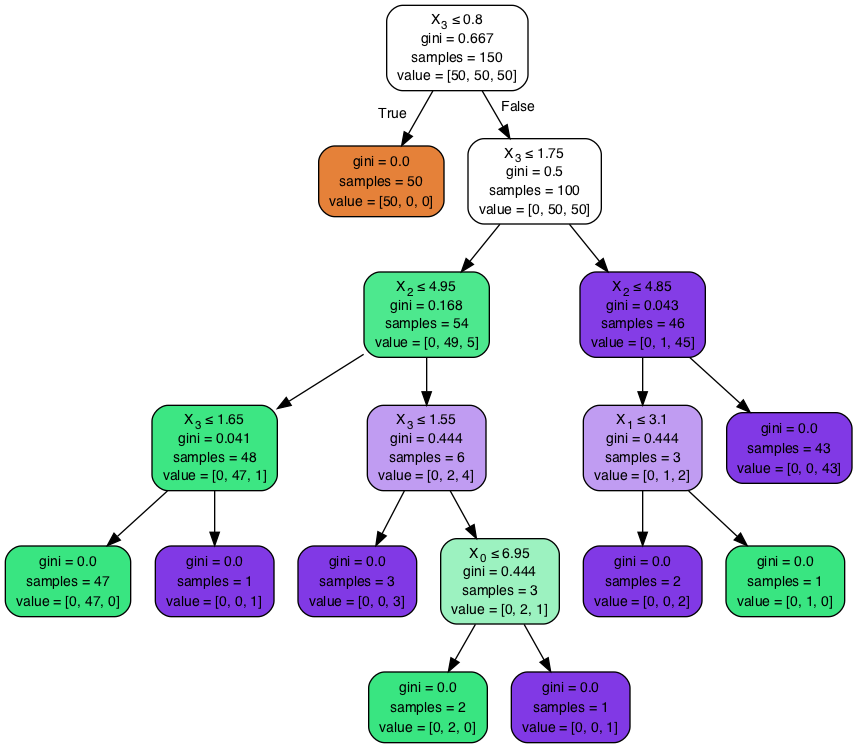

In [9]:
# visualization of the class tree
tree = iris_d_tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,\
                filled=True, rounded=True,\
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

###### Measuring "Loss"
We measure how well a variable split for any given node is by purity, since we want to reward our tree for being more certain of a prediction, and punish it if it is uncertain.

Mathematically, 
"Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset"

Essentially, how sure can you be of being correct if you go down every branch. 

###### Greedy Algorithm
Our primary optimization aglorithm, the "greedy" algorithm, tries to maximize purity at each node, but will pay no attention to global purity. (possibly ending up in a locally optimal scenario, but a globally inoptimal scenario)

From this stucture, we derive a few pros and cons with this model

Benefits of the Decision Tree Model:
- The model is very easily understood.
- We can verify decisions it makes, and we can explain them, and sometimes even confirm them using statistical methods.
- Unlike things like neural networks, which are on the other end, being siginificantly more opaque.

Shortcomings of the model:
- We have a model with very high instabliity.
- Overfitting is a big problem (so much so we have algorithms to correct for that).
- Optimization techniques are not globally optimal (greedy algorithm).

We want to find ways to use the benefits of the tree structure for making decisions and learning, but also lessening the the major flaws (namely overfitting).

###### Decision Tree Variants:
There are a number of important variants to classic CARTs

- Boosted Trees: When we "Boost" decision trees, we create a series of decision trees off of an initial model, where each new tree places additional weight on mismodelled data points in the data set, and when this process is done we use the collection of trees to make a predicition.

- Boostrapped aggregated or "Bagged" trees: This is a method where we train a number of decision trees independantly off of our dataset, and then take the mode, or mean of the outputs of these trees as the output when predicting. Random Forest is of this type.

## Random Forest

Random forest is, a collection (or an ensemble) of decision trees trained over different partitions of the data set,
where the output of the model is the mode (classification trees) or the mean (regression trees) of the outputs of each individual tree.

When we have decision trees that are deep and specialized to their dataset, we will often find these trees have very high variance, that is to say they overfit to their dataset.

The idea behind Random Forest is that if we use a large number of these types of trees trained on different parts of the datset, and then average them, we get a much better result without losing the complexity of the predictions over the dataset. In this way, Random Forest combats overfitting. 

###### Bagging
When training each tree in the ensemble, there are different ways to partition data to each tree. The most obvious would be to give the entire dataset to each tree, and expect the instability of the trees to lead to a set of trees which would work well when averaged. In practice, it is better to keep the trees uncorrelated, that is to say, giving each tree data unique data relative to every other tree. One way to decorrelate the decision trees is to fit each one on a random sample of the dataset (this is called "Bagging").

In [10]:
iris_rndfrst = ensemble.RandomForestClassifier(max_depth=3, n_estimators=100)
#estimators is the number of trees in the forest
# a link for all parameter definitions: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier


In [11]:
cal_rndfrst = ensemble.RandomForestRegressor(max_depth=6, n_estimators=100)
#Link to parameter definitions
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor


In [12]:
#fitting our random forest classifier
iris_rndfrst.fit(irisdata,irislabels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
#Forest feature importances (Iris)
print(iris_rndfrst.feature_importances_)

[0.09525264 0.00522147 0.42213904 0.47738685]


In [14]:
#Tree feature importances (Iris)
print(iris_d_tree.feature_importances_)

[0.01333333 0.01333333 0.05072262 0.92261071]


In [15]:
#fitting our random forest regressor
cal_rndfrst.fit(caldata,callabels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
#Forest feature importances (Cal Housing)
print(cal_rndfrst.feature_importances_)

[0.71435844 0.04383781 0.02202602 0.00215951 0.00505263 0.14309617
 0.04103331 0.0284361 ]


In [17]:
#Singular Tree feature importances (Cal Housing )
print(cal_r_tree.feature_importances_)

[0.52493066 0.05099015 0.0526974  0.02698773 0.03264713 0.13162226
 0.09479904 0.08532563]


In [18]:
predicted_frst = 0
predicted_tree = 0
for i in range(len(irisdata)):
    if iris_rndfrst.predict([irisdata[i]]) == irislabels[i]:
        predicted_frst += 1
    if iris_d_tree.predict([irisdata[i]]) == irislabels[i]:
        predicted_tree += 1

In [19]:
#we can see how the singular decision tree overfits, since it perfectly predicted the training data
predicted_tree/len(irisdata)

1.0

In [20]:
#we can see here, the forest, while getting near perfect on the training data, got a bit less than the singular tree
predicted_frst/len(irisdata)

0.9666666666666667

In [21]:
# we can also look at the difference between the results of 
# the regression tree and random forest on training data samples
print("R-Tree:",cal_r_tree.predict([caldata[9]])," Random Forest:", cal_rndfrst.predict([caldata[9]]))

R-Tree: [2.611]  Random Forest: [2.95776445]


While Random forest works well, we do get a few drawbacks with it.
Most notably, we lose the transparent nature of a decision tree: we can't understand as well as before how the model made the decision, and why it made its decision. Likewise, for boosting algorithms, the same holds true: we lose a level of understanding when we use many decision trees in cojunction.

##### Random Forest or decision tree libraries
- randomForest library- Random Forest in R -https://cran.r-project.org/web/packages/randomForest/index.html
- Scikit - For Python - https://scikit-learn.org/stable/ 
- Matlab - https://code.google.com/archive/p/randomforest-matlab/
- Orange - https://orange.biolab.si/

##### Random Forest Examples:
- An algorithm which predicts the quality of survey quests - http://sqp.upf.edu/

##### Other method of measuring purity
- An article on Entropy (the other popular method of purity measurement):https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

##### Boosting Algorithm
- Quick introduction to Adaboosting, a popular tree boosting methodology: https://towardsdatascience.com/boosting-algorithm-adaboost-b6737a9ee60c

In [22]:
# Extra

In [23]:
# random classification problem generation
# the command .make_classification generates a random data set based on some parameters
# we can use this data to fit our decision tree
x, y = sklearn.datasets.make_classification(n_samples=1000, n_features=3,\
                                            n_informative=2, n_redundant=0,\
                                            random_state=0, shuffle=False)

In [24]:
x_tree = sklearn.tree.DecisionTreeClassifier()
x_forest = ensemble.RandomForestClassifier(max_depth=2, n_estimators=100,)

In [25]:
x_tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
x_forest.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)